In [54]:
import numpy as np
import os
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from zipfile import ZipFile
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten




In [48]:
from google.colab import files

uploaded = files.upload()


for filename in uploaded.keys():
    print('Uploaded file "{name}" with length {length} bytes'.format(
        name=filename, length=len(uploaded[filename])))


Saving kaggle.json to kaggle (1).json
Uploaded file "kaggle (1).json" with length 67 bytes


In [49]:
!kaggle datasets download -d alxmamaev/flowers-recognition

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [50]:
from zipfile import ZipFile
file_name="/content/flowers-recognition.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [51]:
dandelion_dir = '/content/flowers/dandelion'
tulip_dir = '/content/flowers/tulip'

X = []
y = []

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (100, 100))
    image = np.array(image) / 255.0
    return image

for filename in os.listdir(dandelion_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(dandelion_dir, filename)
        image = preprocess_image(image_path)
        X.append(image)
        y.append(0)

for filename in os.listdir(tulip_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(tulip_dir, filename)
        image = preprocess_image(image_path)
        X.append(image)
        y.append(1)


X = np.array(X)
y = np.array(y)

X, y = shuffle(X, y, random_state=42)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (2036, 100, 100, 3)
y shape: (2036,)


In [52]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
print(y_test.shape)


(1628, 100, 100, 3)
(408,)
(408, 100, 100, 3)
(408,)


In [53]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/10
51/51 [==============================] - 31s 596ms/step - loss: 0.5297 - accuracy: 0.7248 - val_loss: 0.3316 - val_accuracy: 0.8529
Epoch 2/10
51/51 [==============================] - 30s 595ms/step - loss: 0.3516 - accuracy: 0.8606 - val_loss: 0.2927 - val_accuracy: 0.8799
Epoch 3/10
51/51 [==============================] - 29s 576ms/step - loss: 0.3071 - accuracy: 0.8661 - val_loss: 0.3232 - val_accuracy: 0.8505
Epoch 4/10
51/51 [==============================] - 28s 554ms/step - loss: 0.2511 - accuracy: 0.8962 - val_loss: 0.2356 - val_accuracy: 0.8971
Epoch 5/10
51/51 [==============================] - 32s 613ms/step - loss: 0.2295 - accuracy: 0.9017 - val_loss: 0.2118 - val_accuracy: 0.9069
Epoch 6/10
51/51 [==============================] - 30s 591ms/step - loss: 0.1862 - accuracy: 0.9318 - val_loss: 0.2182 - val_accuracy: 0.8946
Epoch 7/10
51/51 [==============================] - 29s 574ms/step - loss: 0.1660 - accuracy: 0.9361 - val_loss: 0.2278 - val_accuracy: 0.8995

In [55]:
def predict_image(index):
  image = X_test[index].reshape((1,100, 100, 3))
  # image = X_test[index:index+1]
  true_label = y_test[index]

  predicted_prob=model.predict(image)
  predicted_label= "Tulip" if predicted_prob >=0.5 else "Dandelion"

  plt.figure()
  plt.imshow(X_test[index])
  plt.title(f"Predicted Label: {predicted_label} (Probability: {predicted_prob[0][0]:.4f})\nTrue Label: {'Tulip' if true_label == 1 else 'Dandelion'}")
  plt.axis('off')
  plt.show()


1/1 [==============================] - 0s 25ms/step


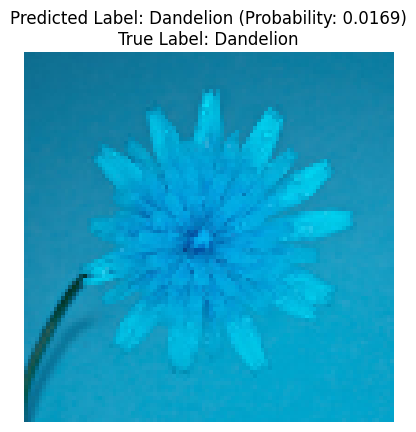

In [69]:
index=random.randint(0,407)
predict_image(index)